- <span style = 'font-size:1.3em;line-height:1.5em'>GradCAM을 직접 구현할 수도 있습니다만, 여기서는 외부 라이브러리를 사용해보도록 하죠.</span>
    - <span style = 'font-size:1.2em;line-height:1.5em'>https://github.com/jacobgil/pytorch-grad-cam</span>

# 설치하기

In [1]:
# !pip install grad-cam

- <span style = 'font-size:1.3em;line-height:1.5em'>GradCAM에서 발전된 방법론들, 그리고 다양한 task에서 GradCAM을 사용할 수 있도록 개발되었습니다.</span>
    - <span style = 'font-size:1.2em;line-height:1.5em'>방법론: GradCAM++, XGradCAM, ...</span>
    - <span style = 'font-size:1.2em;line-height:1.5em'>task: Classification, Segmentation, ...</span>

- <span style = 'font-size:1.3em;line-height:1.5em'>여기선 가장 간단한 GradCAM을 Classification 상황에서 사용해보죠.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
import requests
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image

In [2]:
model = models.resnet50(pretrained=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
image_url = "https://th.bing.com/th/id/R.94b33a074b9ceeb27b1c7fba0f66db74?rik=wN27mvigyFlXGg&riu=http%3a%2f%2fimages5.fanpop.com%2fimage%2fphotos%2f31400000%2fBear-Wallpaper-bears-31446777-1600-1200.jpg&ehk=oD0JPpRVTZZ6yizZtGQtnsBGK2pAap2xv3sU3A4bIMc%3d&risl=&pid=ImgRaw&r=0"
img = np.array(Image.open(requests.get(image_url, stream=True).raw))
img = cv2.resize(img, (224, 224))
img = np.float32(img) / 255
input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

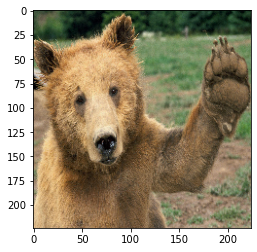

In [6]:
plt.imshow(img)

### The target for the CAM is the Bear category.
### As usual for classication, the target is the logit output before softmax, for that category.

In [7]:
targets = [ClassifierOutputTarget(295)]
target_layers = [model.layer4]

In [13]:
targets[0].category

295

In [12]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [13]:
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)

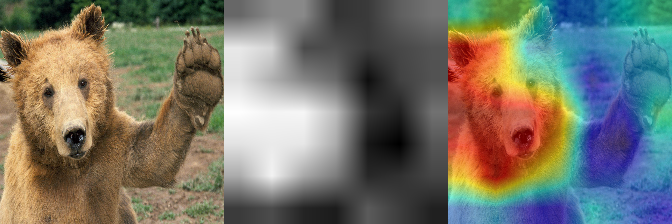

In [14]:
cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])
images = np.hstack((np.uint8(255*img), cam , cam_image))
Image.fromarray(images)

- <span style = 'font-size:1.3em;line-height:1.5em'>엉뚱한 class를 적용하면?</span>

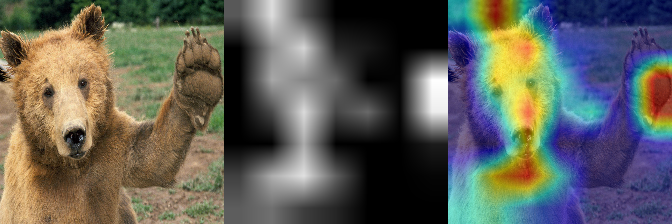

In [15]:
targets = [ClassifierOutputTarget(200)]
target_layers = [model.layer4]

with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
    
cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])
images = np.hstack((np.uint8(255*img), cam , cam_image))
Image.fromarray(images)